# Лабораторна робота 4
### Студента групи МІТ-31 (підгрупа 2)
### Рубан Маргарита Юріївна

## Завдання
1. Здійснити загальні операції з використанням TensorFlow (створити набір даних (розмір за власним рішенням) у вигляді тензорів, провести CRUD операції над даними (скаляр, вектор, матриця)).
2. Згенерувати набір даних для регресії та класифікації з використанням TensorFlow
3. Здійснити графічний аналіз наборів даних за допомогою Matplotlib
4. Відповіді оформити .ipynb документом
5. Викласти у зазначений репозіторій GitHub в окремій папці з назвою Lab4 де має бути .ipynb файл та необхідні файли з даними


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
import tensorflow as tf

### Пункт 1

In [60]:
tf1 = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(tf1)
print(np.square(tf1))
tf1 = tf1 + 100
print(tf1)
tf1_new = tf.gather(tf1, [1])
print(tf1_new)

tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32)
[[ 1  4  9]
 [16 25 36]
 [49 64 81]]
tf.Tensor(
[[101 102 103]
 [104 105 106]
 [107 108 109]], shape=(3, 3), dtype=int32)
tf.Tensor([[104 105 106]], shape=(1, 3), dtype=int32)


In [61]:
scalar = tf.constant(9)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=9>

In [62]:
scalar.ndim

0

In [63]:
vector = tf.constant([18, 12, 15])
vector

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([18, 12, 15], dtype=int32)>

In [64]:
vector.ndim

1

In [65]:
mat1 = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
mat1

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]], dtype=int32)>

In [66]:
mat1.ndim

2

In [67]:
mat2 = tf.constant([[1., 2., 3.],
                    [4., 5., 6.],
                    [7., 8., 9.]], dtype=tf.float16)

mat2

<tf.Tensor: shape=(3, 3), dtype=float16, numpy=
array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]], dtype=float16)>

In [68]:
mat2.ndim

2

In [69]:
tensor = tf.constant([[[1, 2, 3,],
                       [4, 5, 6]],
                      [[7, 8, 9],
                       [10, 11, 12]],
                      [[13, 14, 15],
                       [16, 17, 18]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]], dtype=int32)>

In [70]:
tensor.ndim

3

In [71]:
rnd1 = tf.random.Generator.from_seed(70)
rnd1 = rnd1.normal(shape=(40, 20))
rnd2 = tf.random.Generator.from_seed(10)
rnd2 = rnd2.normal(shape=(50, 30))

In [72]:
df2 = pd.DataFrame(np.random.randint(0, 10, (8, 8)), columns=["x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8"])
print(df2)
print(df2.describe(include='all'))

   x1  x2  x3  x4  x5  x6  x7  x8
0   7   6   1   5   5   6   8   4
1   5   3   2   4   5   5   8   1
2   6   9   1   1   0   6   3   6
3   8   6   3   5   4   6   4   7
4   6   6   7   8   9   7   6   3
5   0   4   6   0   5   5   8   0
6   8   4   9   6   6   5   1   0
7   8   6   4   0   4   4   9   8
             x1       x2        x3        x4        x5       x6        x7  \
count  8.000000  8.00000  8.000000  8.000000  8.000000  8.00000  8.000000   
mean   6.000000  5.50000  4.125000  3.625000  4.750000  5.50000  5.875000   
std    2.672612  1.85164  2.948971  2.973094  2.492847  0.92582  2.900123   
min    0.000000  3.00000  1.000000  0.000000  0.000000  4.00000  1.000000   
25%    5.750000  4.00000  1.750000  0.750000  4.000000  5.00000  3.750000   
50%    6.500000  6.00000  3.500000  4.500000  5.000000  5.50000  7.000000   
75%    8.000000  6.00000  6.250000  5.250000  5.250000  6.00000  8.000000   
max    8.000000  9.00000  9.000000  8.000000  9.000000  7.00000  9.000000   



In [73]:
training_df: pd.DataFrame = pd.DataFrame(
    data={
        'feature1': np.random.rand(10),
        'feature2': np.random.rand(10),
        'feature3': np.random.rand(10),
        'target': np.random.randint(0, 5, 10)
    }
)
features = ['feature1', 'feature2', 'feature3']
print(training_df)

training_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(training_df[features].values, tf.float32),
            tf.cast(training_df['target'].values, tf.int32)
        )
    )
)

for features_tensor, target_tensor in training_dataset:
    print(f'features:{features_tensor} target:{target_tensor}')

   feature1  feature2  feature3  target
0  0.834275  0.667517  0.063538       3
1  0.259943  0.523435  0.560316       2
2  0.090543  0.097074  0.584139       0
3  0.772502  0.917795  0.064132       3
4  0.106356  0.354154  0.238921       0
5  0.899008  0.918768  0.296861       2
6  0.061308  0.646493  0.129649       1
7  0.300442  0.776085  0.933893       1
8  0.084634  0.589887  0.923934       3
9  0.509013  0.396275  0.375103       3
features:[0.8342746  0.6675171  0.06353834] target:3
features:[0.25994283 0.523435   0.56031585] target:2
features:[0.09054292 0.09707367 0.58413947] target:0
features:[0.77250236 0.91779536 0.06413165] target:3
features:[0.10635599 0.35415447 0.23892099] target:0
features:[0.899008   0.9187675  0.29686102] target:2
features:[0.06130757 0.6464931  0.12964924] target:1
features:[0.30044153 0.7760847  0.93389326] target:1
features:[0.08463426 0.58988667 0.9239341 ] target:3
features:[0.5090125  0.39627466 0.37510347] target:3


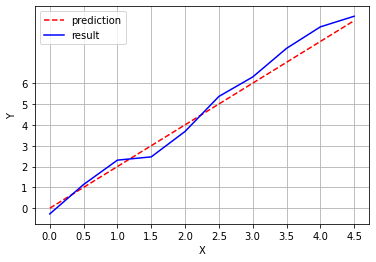

In [74]:
x = np.arange(0, 5, 0.5)
y1 = x * 2

adder = np.random.random(len(x)) * 1.5 - 0.7
y2 = y1 + adder

plt.figure()
plt.grid()
plt.xticks(x)
plt.yticks(range(int(x[-1] * 1.5 + 1)))
plt.xlabel('X')
plt.ylabel('Y')

plt.plot(x, y1, "r--", label="prediction")
plt.plot(x, y2, "b", label="result")

plt.legend()
plt.show()

In [75]:
import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(y2, y1)
mse = metrics.mean_squared_error(y2, y1)
print(mae)
print(mse)

0.38112331358358953
0.1778509386112659


In [76]:
df = pd.DataFrame(np.array([x, y2, y1]).swapaxes(0,1), columns=['X', 'Y', 'Y_hat'])
print(df)
with open('data.csv', 'w') as f:
    f.write(df.to_csv(index=False))

     X         Y  Y_hat
0  0.0 -0.273688    0.0
1  0.5  1.138428    1.0
2  1.0  2.306630    2.0
3  1.5  2.463547    3.0
4  2.0  3.683797    4.0
5  2.5  5.362790    5.0
6  3.0  6.296778    6.0
7  3.5  7.669192    7.0
8  4.0  8.700604    8.0
9  4.5  9.210467    9.0


In [77]:
input_shape = x[0].shape 
output_shape = y1[0].shape
input_shape, output_shape 

tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(x, y1, epochs=80)

Epoch 1/80


ValueError: in user code:

    File "/Users/margosha/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "/Users/margosha/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/margosha/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "/Users/margosha/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 808, in train_step
        y_pred = self(x, training=True)
    File "/Users/margosha/opt/anaconda3/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/margosha/opt/anaconda3/lib/python3.8/site-packages/keras/engine/input_spec.py", line 227, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential_3" (type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None,), dtype=float32)
      • training=True
      • mask=None


In [ ]:
X_train = x[:80]
y_train = y1[:80]

X_test = x[80:] 
y_test = y1[80:]

len(X_train), len(X_test)

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, c='b', label='Training')
plt.scatter(X_test, y_test, c='g', label='Testing')
plt.legend()

In [ ]:
model.summary()

In [ ]:
model.fit(X_train, y_train, epochs=80, verbose=0)

In [ ]:
model.predict([20.0])

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), 
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), 
                metrics=['accuracy'])

model_1.fit(x, y1, epochs=20, verbose=0)

In [ ]:
def plot_decision_boundary(model, X, y):
    
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  x_in = np.c_[xx.ravel(), yy.ravel()]
 
  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [ ]:
tf.random.set_seed(42)

X_regression = np.arange(0, 100, 5)
y_regression = np.arange(100, 110, 5)

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [ ]:
model_1.evaluate(x, y1)

In [ ]:
len(x)

In [ ]:
X_train, y_train = x[:800], y1[:800]
X_test, y_test = x[800:], y1[800:]

X_train.shape, X_test.shape

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.01), 
                metrics=['accuracy'])

history = model_2.fit(X_train, y_train, epochs=25)

In [ ]:
pd.DataFrame(history.history)

In [ ]:
pd.DataFrame(history.history).plot()
plt.title("training_2 ")

In [ ]:
input_shape = x[0].shape 
output_shape = y1[0].shape
input_shape, output_shape 

tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(x, y1, epochs=80)

In [ ]:
X_train = x[:80]
y_train = y1[:80]

X_test = x[80:] 
y_test = y1[80:]

len(X_train), len(X_test)

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, c='b', label='Training')
plt.scatter(X_test, y_test, c='g', label='Testing')
plt.legend()

In [ ]:
model.summary()

In [ ]:
model.fit(X_train, y_train, epochs=80, verbose=0)

In [ ]:
model.predict([20.0])